# LUNG CANCER DATASET


The effectiveness of cancer prediction system helps the people to know their cancer risk with 
low cost and it also helps the people to take the appropriate decision based on their cancer risk status.
The data is collected from the website online lung cancer prediction system .

Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 
            2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 
            5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1.
            7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 
            9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 
            12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1.
            15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data 
df=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//lung_cancer.csv",header=0)

print(df.head())

df.columns

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                 2                      2           2     

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_BREATH       309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

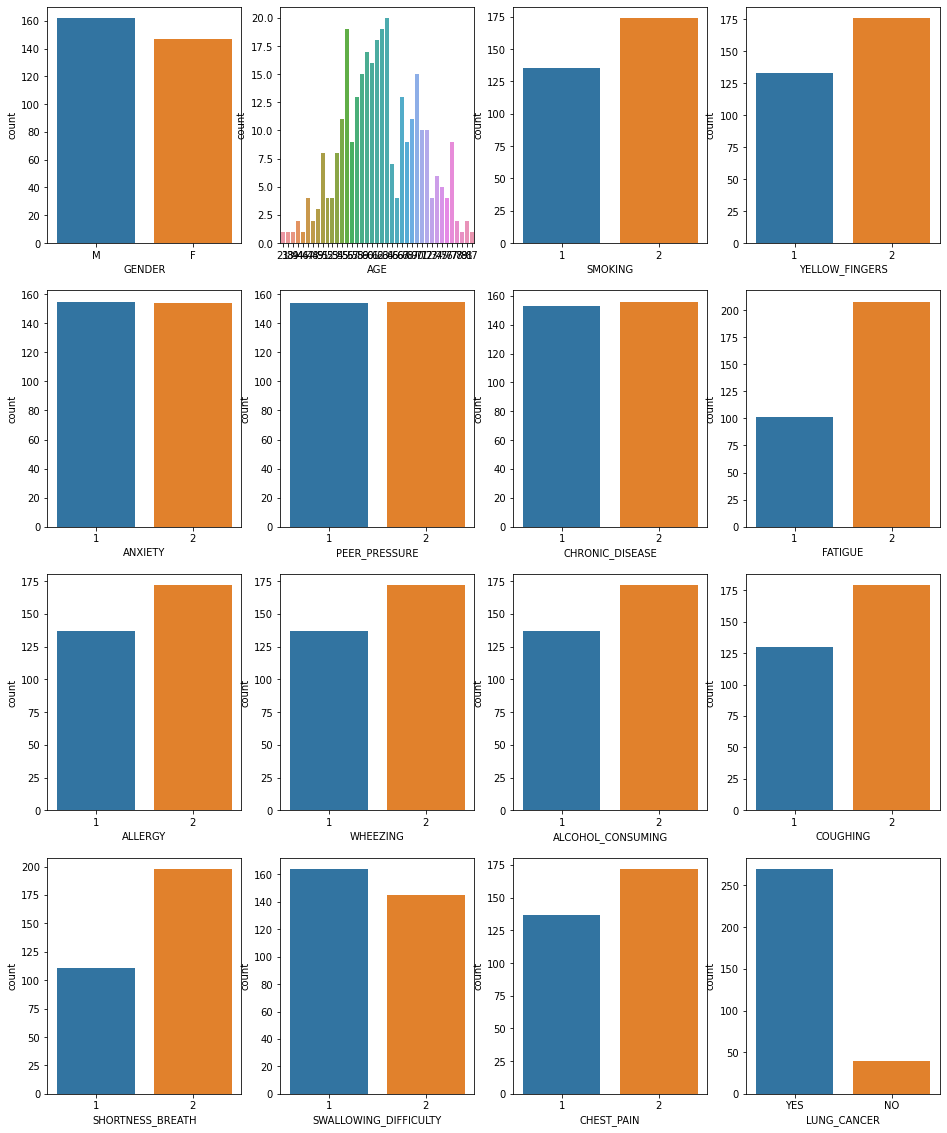

In [4]:
fig,ax=plt.subplots(4,4)
fig.set_size_inches(16,20)

sn.countplot(x=df.columns[0],data=df,ax=ax[0][0])
sn.countplot(x=df.columns[1],data=df,ax=ax[0][1])
sn.countplot(x=df.columns[2],data=df,ax=ax[0][2])
sn.countplot(x=df.columns[3],data=df,ax=ax[0][3])
sn.countplot(x=df.columns[4],data=df,ax=ax[1][0])
sn.countplot(x=df.columns[5],data=df,ax=ax[1][1])
sn.countplot(x=df.columns[6],data=df,ax=ax[1][2])
sn.countplot(x=df.columns[7],data=df,ax=ax[1][3])
sn.countplot(x=df.columns[8],data=df,ax=ax[2][0])
sn.countplot(x=df.columns[9],data=df,ax=ax[2][1])
sn.countplot(x=df.columns[10],data=df,ax=ax[2][2])
sn.countplot(x=df.columns[11],data=df,ax=ax[2][3])
sn.countplot(x=df.columns[12],data=df,ax=ax[3][0])
sn.countplot(x=df.columns[13],data=df,ax=ax[3][1])
sn.countplot(x=df.columns[14],data=df,ax=ax[3][2])
sn.countplot(x=df.columns[15],data=df,ax=ax[3][3])

Text(0.5, 1.0, 'Age Distribution')

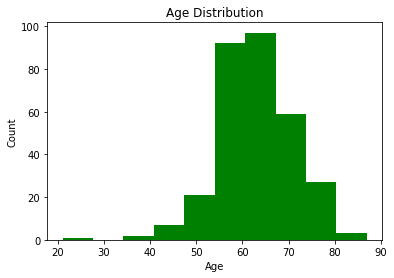

In [5]:
# Age distribution

plt.hist(df.AGE,color='g')
plt.xlabel('Age');plt.ylabel('Count')
plt.title('Age Distribution')

# CORRELATION PLOT

To check the correlation of each variable with the output (target) variable



Text(0.5, 1.0, 'Correlation Plot')

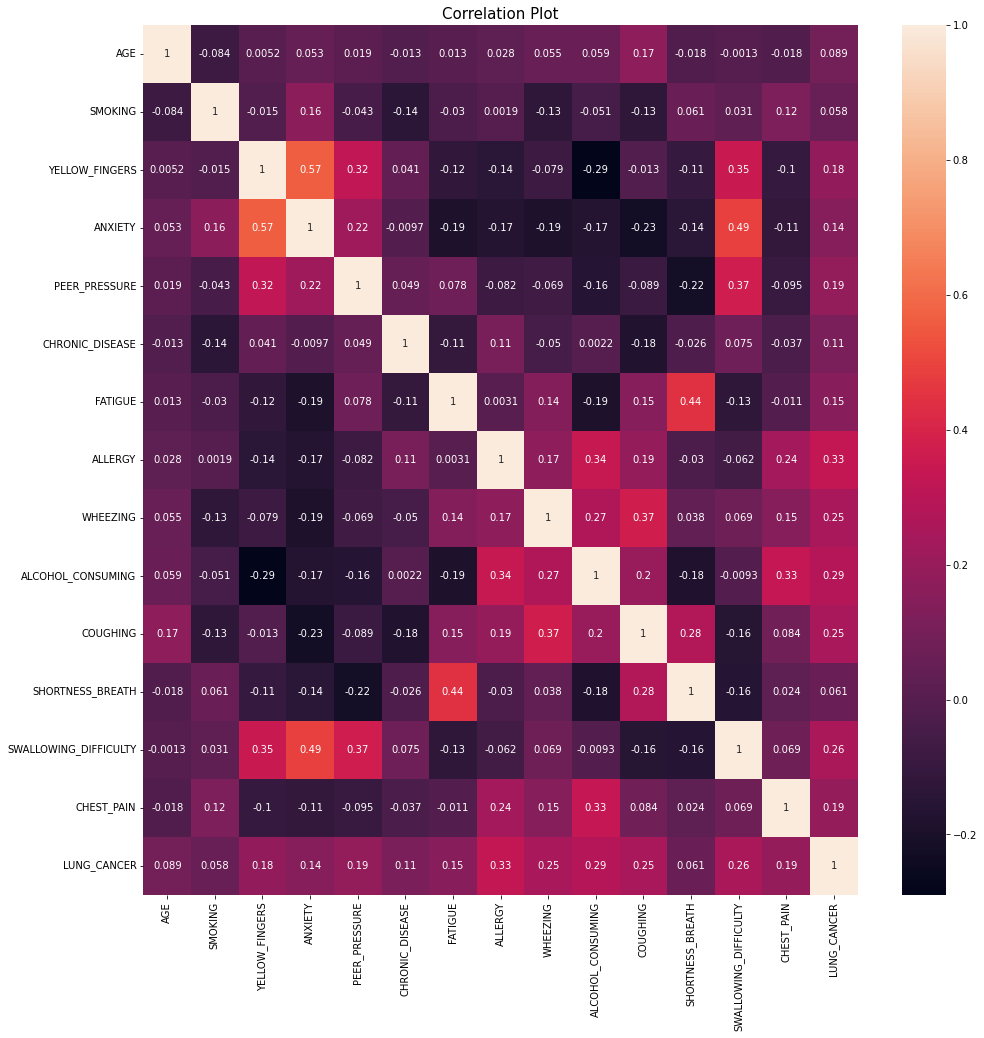

In [6]:
#Cor plot
import seaborn as sn

df['LUNG_CANCER'] = df['LUNG_CANCER'].factorize(['NO','YES'])[0] # Change data type of target variable 

plt.figure(figsize = (16,16))
sn.heatmap(df.corr(), annot = True, cmap =None)

plt.title('Correlation Plot',fontsize=15)

# Observations from Correaltion plot

Smoking have low corr with lung cancer

Allergy, Alcohol consumption and Swallowing difficulty have most corr with lung cancer 

# CHI-SQUARE TEST 

(if p value <0.05 or 5% then var1 is independent of var2 )

-> make a cross tab

   ct=pd.crosstab(df.var1,df.var2,margins=True)

-> from scipy.stats import chi2_contingency
   
   chi2_contingency(val)[0:3] 

In [13]:
cancer_smoking = pd.crosstab(df['SMOKING'],df['LUNG_CANCER'],margins = True)
cancer_smoking

LUNG_CANCER,0,1,All
SMOKING,,,
1,20,115,135
2,19,155,174
All,39,270,309


In [14]:
# CHI-SQUARE TEST 

from scipy.stats import chi2_contingency

val = np.array([cancer_smoking.iloc[0][0:5].values,
                  cancer_smoking.iloc[1][0:5].values])

chi2_contingency(val)[0:3] # Chi_statistics, p-value, dof

(1.0458978725262236, 0.5927699272702015, 2)

In [ ]:
# Observation from chi-square test

# As p value is gr than 0.05 then smoking is independent of Lung Cancer in this dataset.

# Prepare Data 

In [3]:
df_mod=df.replace({'M','F'},[0,1])
df_mod

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
input_X=df_mod.drop('LUNG_CANCER',axis='columns')
y=df.LUNG_CANCER


input_X
y

# IMP VAR
X_new=df[['ALLERGY','ALCOHOL_CONSUMING','SWALLOWING_DIFFICULTY','WHEEZING','COUGHING','CHEST_PAIN','PEER_PRESSURE']]
X_new

,ALLERGY,ALCOHOL_CONSUMING,SWALLOWING_DIFFICULTY,WHEEZING,COUGHING,CHEST_PAIN,PEER_PRESSURE
0,1,2,2,2,2,2,1
1,2,1,2,1,1,2,1
2,1,1,1,2,2,2,2
3,1,2,2,1,1,2,1
4,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...
304,1,2,2,1,2,1,2
305,2,2,1,2,2,2,1
306,2,2,1,2,2,2,1
307,2,2,1,1,2,2,1


In [5]:
# dummies
dummies=pd.get_dummies(data=X_new,columns=['ALLERGY','ALCOHOL_CONSUMING','SWALLOWING_DIFFICULTY','WHEEZING','COUGHING','CHEST_PAIN','PEER_PRESSURE'])

# to escape dummy trap
X=dummies.drop(['ALLERGY_1','ALCOHOL_CONSUMING_1','SWALLOWING_DIFFICULTY_1','WHEEZING_1','COUGHING_1','CHEST_PAIN_1','PEER_PRESSURE_1'],axis='columns')

# final input with dummies 
X

,ALLERGY_2,ALCOHOL_CONSUMING_2,SWALLOWING_DIFFICULTY_2,WHEEZING_2,COUGHING_2,CHEST_PAIN_2,PEER_PRESSURE_2
0,0,1,1,1,1,1,0
1,1,0,1,0,0,1,0
2,0,0,0,1,1,1,1
3,0,1,1,0,0,1,0
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
304,0,1,1,0,1,0,1
305,1,1,0,1,1,1,0
306,1,1,0,1,1,1,0
307,1,1,0,0,1,1,0


In [6]:
# Test Train Split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_test

,ALLERGY_2,ALCOHOL_CONSUMING_2,SWALLOWING_DIFFICULTY_2,WHEEZING_2,COUGHING_2,CHEST_PAIN_2,PEER_PRESSURE_2
238,1,0,0,1,1,1,0
257,1,1,0,1,1,1,0
214,0,0,1,0,1,1,1
70,1,1,1,0,0,1,1
139,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...
181,0,0,1,1,1,0,1
38,0,0,0,1,0,1,0
112,0,0,0,1,1,1,1
111,1,1,1,0,0,1,0


# UNSUPERVISED ML: K MEANS CLUSTERING

In [7]:
# KMeans Clustering

from sklearn.cluster import KMeans

km=KMeans(n_clusters=2)

# fit 
km.fit(X)

# predict
y_pred_km=km.predict(X)
y_pred_km

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

[534.5501618122979, 420.7187235841082, 359.90955321862856, 312.82549198389256, 289.3962417252926, 266.59594801082795, 248.59142961835926, 227.65728336007425, 219.33644413904358, 201.56898116907416]


Text(0.5, 1.0, 'Elbow Plot')

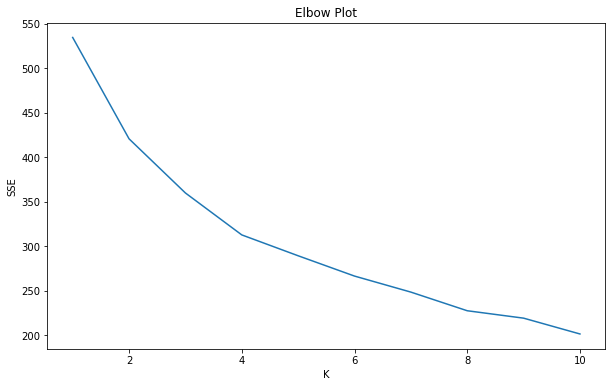

In [8]:
# Elbow technique ( to get best k value)

sse=[]
k=range(1,11)
for i in range(1,11):
    km=KMeans(n_clusters=i)  # k value
    km.fit(X)
    sse_temp=km.inertia_
    sse.append(sse_temp)

print(sse)

# plot elbow 
plt.figure(figsize=(10,6))
plt.plot(k,sse)
plt.xlabel('K');plt.ylabel('SSE');plt.title('Elbow Plot')

# SUPERVISED ML ALGORTHMS

# Logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

# train model
model_lr.fit(X_train,y_train)

# prediction 
y_pred_lr=model_lr.predict(X_test)

# score
acc_lr=model_lr.score(X_test,y_test)
print("The score of the LR model is:",round(acc_lr*100,2),"%")

# y_pred
y_pred_lr

The score of the LR model is: 88.17 %


array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES'], dtype=object)

In [10]:
# Evaluation metrics

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

cm_lr=confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[ 2  7]
 [ 4 80]]


Text(69.0, 0.5, 'Ground Truth')

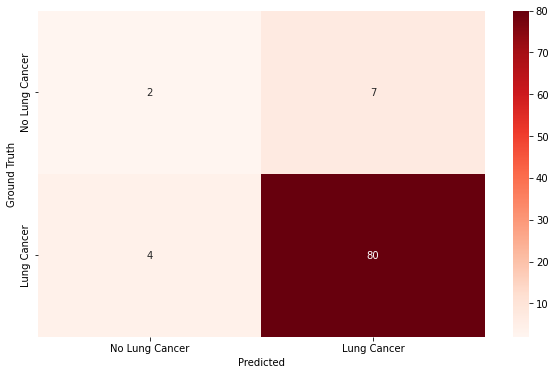

In [11]:
# heatmap of the matrix
import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(cm_lr,annot=True,fmt='g',cmap='Reds',xticklabels=['No Lung Cancer','Lung Cancer'],yticklabels=['No Lung Cancer','Lung Cancer'])
plt.xlabel('Predicted');plt.ylabel('Ground Truth')

# Decision Tree Classifier

In [12]:
# Using Decision Tree

from sklearn import tree
model_dt=tree.DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
# score of model
acc_dt=model_dt.score(X_test,y_test)
print(f"The score of the Decision Tree model is: {round(acc_dt*100,2)}%")

y_pred_dt=model_dt.predict(X_test)

The score of the Decision Tree model is: 90.32%


In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)

[[ 4  5]
 [ 4 80]]


# Random Forrest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=400)

# train model
model_rf.fit(X_train,y_train)

# prediction
y_pred_rf=model_rf.predict(X_test)

# score
acc_rf=model_rf.score(X_test,y_test)
print(f"The score of the Random Forest Classifier is: {round(acc_rf*100,2)}%")

The score of the Random Forest Classifier is: 90.32%


In [16]:
# Confusion matrix

cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[ 4  5]
 [ 4 80]]


Text(69.0, 0.5, 'Ground Truth')

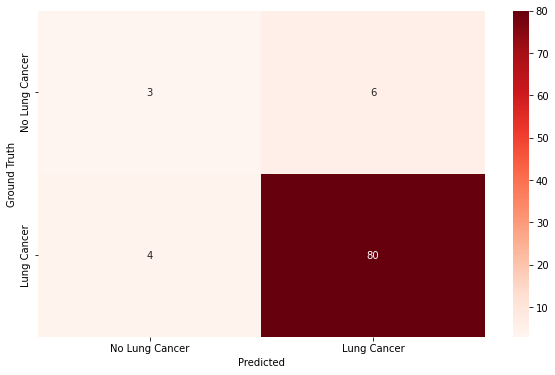

In [19]:
# heatmap of the matrix
import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(cm_rf,annot=True,fmt='g',cmap='Reds',xticklabels=['No Lung Cancer','Lung Cancer'],yticklabels=['No Lung Cancer','Lung Cancer'])
plt.xlabel('Predicted');plt.ylabel('Ground Truth')

# Support Vector Machines(SVM)

In [17]:
# SVM model

from sklearn.svm import SVC


#
model_svm=SVC(C=10,gamma=1,kernel='rbf')

# train model
model_svm.fit(X_train,y_train)

# predict
y_pred_svm=model_svm.predict(X_test)

#accuracy 
acc_svm=model_svm.score(X_test,y_test)

Text(69.0, 0.5, 'Ground Truth')

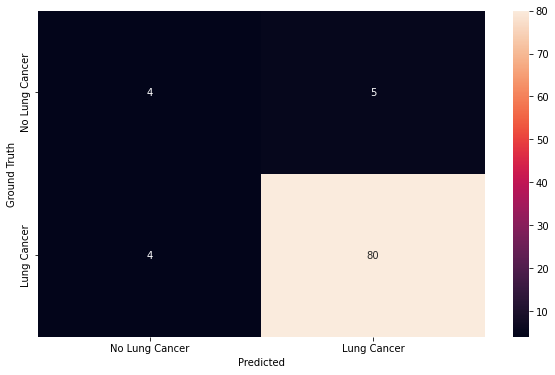

In [18]:
cm_svm=confusion_matrix(y_test,y_pred_svm)
cm_svm

# heatmap of cm_svm
import seaborn as sn

plt.figure(figsize=(10,6))

sn.heatmap(cm_svm,annot=True,xticklabels=['No Lung Cancer','Lung Cancer'],yticklabels=['No Lung Cancer','Lung Cancer'])
plt.xlabel('Predicted');plt.ylabel('Ground Truth')

# K FOLD CROSS VALIDATION

In [19]:
from sklearn.model_selection import cross_val_score

score_svm_kf=cross_val_score(SVC(),X,y)
score_svm_kf

print(f"The mean score of Support Vector Machines by KFOLD is: {score_svm_kf.mean()*100}%")

The mean score of Support Vector Machines by KFOLD is: 90.30142781597038%


In [20]:
score_rf_kf=cross_val_score(RandomForestClassifier(),X,y,cv=15)
score_rf_kf

print(f"The mean score of Random Forest by KFOLD is: {score_rf_kf.mean()*100}%")

The mean score of Random Forest by KFOLD is: 88.99999999999999%


In [24]:
score_dt_kf=cross_val_score(tree.DecisionTreeClassifier(),X,y)
score_dt_kf

print(f"The mean score of Decision Tree by KFOLD is: {score_dt_kf.mean()*100}%")

The mean score of Decision Tree by KFOLD is: 88.03807509254362%


In [25]:
score_lr_kf = cross_val_score(LogisticRegression(),X,y)
score_lr_kf

print(f"The mean score of Logistic Regression by KFOLD is: {score_lr_kf.mean()*100}%")

The mean score of Logistic Regression by KFOLD is: 89.65626652564781%


# Performance of ML Algorithms

Text(0.5, 1.0, 'Performance of ML Algorithms')

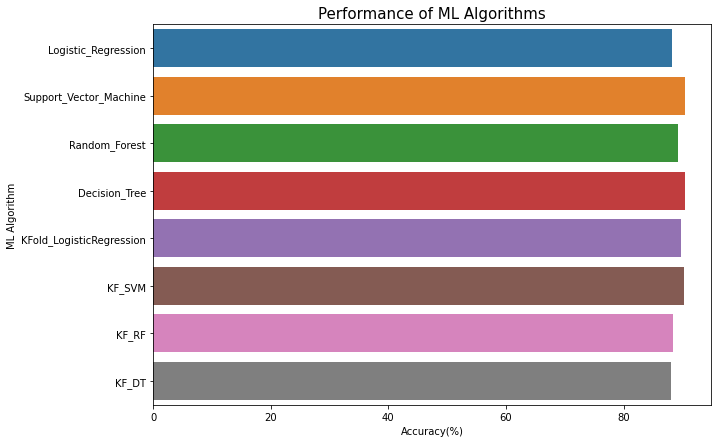

In [26]:

score=[acc_lr*100,acc_svm*100,acc_rf*100,acc_dt*100,score_lr_kf.mean()*100,score_svm_kf.mean()*100,score_rf_kf.mean()*100,score_dt_kf.mean()*100]
a=['Logistic_Regression','Support_Vector_Machine','Random_Forest','Decision_Tree','KFold_LogisticRegression','KF_SVM','KF_RF','KF_DT']


plt.figure(figsize=(10,7))
sn.barplot(score,a,orient='h')
plt.xlabel('Accuracy(%)');plt.ylabel('ML Algorithm');plt.title('Performance of ML Algorithms',fontsize=15)

# Principle Component Analysis (PCA): Dimensionality Reduction

In [22]:
from sklearn.decomposition import PCA

pca=PCA(0.8)

X_pca=pca.fit_transform(X)

np.shape(X_pca)

(309, 5)

In [23]:
# split data
from sklearn.model_selection import train_test_split
# test data is 30% of total dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.3,random_state=1)

X_test_pca

array([[-0.63031556,  0.50264959, -0.2033261 ,  0.02289751, -0.41129892],
       [-1.13024175,  0.36373733,  0.03838675,  0.04866407, -0.07580416],
       [ 0.62122975, -0.51256942, -0.10264425,  0.21840055, -0.92249816],
       [ 0.09002879, -0.81387197,  0.95961593, -0.3657159 ,  0.02478543],
       [-0.32373349,  0.69842269, -0.67186008,  0.42782142,  0.37953789],
       [-0.55981486, -0.26133565, -0.17220402,  0.99645377,  0.02204578],
       [ 0.1858899 ,  0.63716733,  0.90316144, -0.18849936, -0.25661248],
       [-0.0753791 ,  0.21308026, -0.13430364, -1.05137579, -0.04897695],
       [ 0.14491792,  0.67494467, -0.09302562, -0.20782816,  0.65583196],
       [-0.61883467, -0.11704308, -0.4298832 , -0.07821   ,  0.83845651],
       [ 1.25880037,  0.37999503, -0.00803683, -0.23320425, -0.13375156],
       [ 0.58025777, -0.47479208, -1.09883131,  0.19907176, -0.01005372],
       [ 0.99239816,  0.9718527 ,  0.1929146 ,  0.19065799,  0.19872957],
       [ 0.99239816,  0.9718527 ,  0.1

In [24]:
from sklearn.linear_model import LogisticRegression
mdl= LogisticRegression()

# Train the model 
mdl.fit(X_train_pca,y_train)

# 
mdl.score(X_test_pca,y_test)

0.9032258064516129

In [26]:
model_rf2=RandomForestClassifier()

# train model
model_rf2.fit(X_train,y_train)

# prediction
y_pred_rf2=model_rf.predict(X_test)

# score
acc_rf2=model_rf2.score(X_test,y_test)
print(f"The score of the Random Forest Classifier is: {round(acc_rf2*100,2)}%")

The score of the Random Forest Classifier is: 89.25%
